## Colossus halo demo: Spherical overdensity mass and radius

Welcome to the Colossus halo demo. 

In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As always with colossus, we need to set a cosmology.

In [2]:
from colossus.cosmology import cosmology
cosmology.setCosmology('planck15');

Let's begin with the spherical overdensity mass module.

In [3]:
from colossus.halo import mass_so

The most commonly used definitions of halo mass are spherical overdensity definitions. Colossus provides convenient routines to convert between radius, mass, and different definitions. First, let's look at the density thresholds themselves:

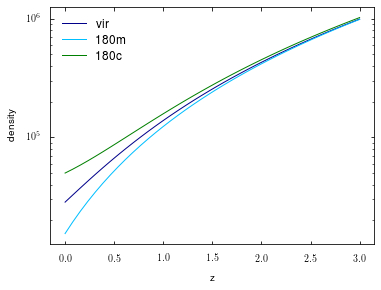

In [5]:
z = np.linspace(0.0, 3.0, 40)

thresh_vir = mass_so.densityThreshold(z, 'vir')
thresh_m = mass_so.densityThreshold(z, '180m')
thresh_c = mass_so.densityThreshold(z, '180c')

plt.figure()
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('density')
plt.plot(z, thresh_vir, label = 'vir');
plt.plot(z, thresh_m, label = '180m');
plt.plot(z, thresh_c, label = '180c');
plt.legend();

We can convert mass and radius into each other, for example, let's get the virial radius of a halo of virial mass 1E12 at z = 0.5, and convert it back:

In [6]:
R = mass_so.M_to_R(1E12, 0.5, 'vir')
print(R)
M2 = mass_so.R_to_M(R, 0.5, 'vir')
print(M2)

152.918690489
1e+12


Now let's convert this halo mass into another definition, say 200c. This function is in the mass_defs module:

In [7]:
from colossus.halo import mass_defs
from colossus.halo import mass_adv

Internally, this function makes an assumption about the density profile of the halo, by default an NFW profile. Thus, we need to give it a concentration:

In [8]:
Mvir = 1E12
cvir = 7.0
M200c, R200c, c200c = mass_defs.changeMassDefinition(Mvir, cvir, 0.5, 'vir', '200c')
print(M200c / Mvir)
print(c200c / cvir)

0.902872609265
0.855615479756


As expected, both M200c and c200c are smaller than their virial counterparts. If we don't want to set the concentration manually, we can also use a model to estimate it:

In [9]:
M200c, R200c, c200c = mass_adv.changeMassDefinitionCModel(Mvir, 0.5, 'vir', '200c')
print(M200c / Mvir)
print(c200c / cvir)

0.903971154079
0.876745736798


We get similar results because the assumption of cvir = 7 probably wasn't crazy. The changeMassDefinition() function is a wrapper around a more general function called pseudoEvolve() which finds spherical overdensity radii and masses under the assumption that a profile is static. The name refers to pseudo-evolution, the change in mass and radius over time due to the changing mass definition. Let's see how much a halo pseudo-evolves between z = 1 and z = 0 if it's profile doesn't change at all:

In [10]:
Mvir_z1 = 1E12
cvir_z1 = 7.0
Mvir_z0, Rvir_z0, cvir_z0 = mass_defs.pseudoEvolve(Mvir_z1, cvir_z1, 1.0, 'vir', 0.0, 'vir') 
print(Mvir_z0 / Mvir_z1)

1.44268324742


The mass of the halo has increased by 44% by z = 0. 